# Comparisons of Lempel-Ziv scores in LLMs-generated creative writing tasks
### Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import glob

In [2]:
results_df = pd.read_csv("../ALL_DSI-lziv_output.csv", header=0, sep=",")
results_df['temp'].replace('n.a.', 'Mid', inplace=True)#

In [3]:
results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT4')]['temp'].unique()

array(['Very High', 'High', 'Low', 'Very Low', 'Mid'], dtype=object)

### Flash fictions

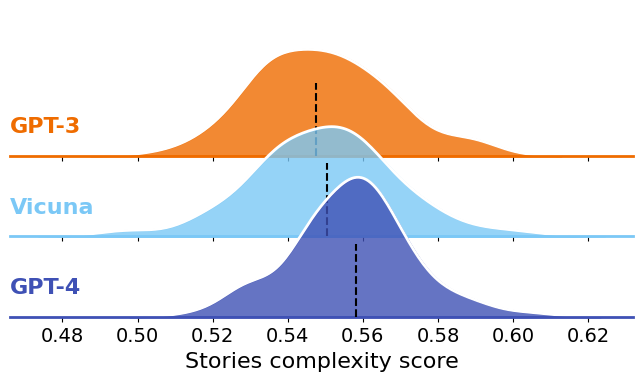

In [ ]:

colors = {'GPT-3':'#EF6C00',
          'GPT-4':'#3F51B5',
          'Humans':'darkgrey',
          'Vicuna':'#7BC8F6'}

df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']=='flash-fiction') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)
df["model"].replace("human", "Humans", inplace=True)

# Calculate the medians
medians = df.groupby("model")["lziv"].median()
# Order models by median
order = medians.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

g = sns.FacetGrid(df, row="model", hue="model", aspect=9, height=1.3, palette=colors)
# set figure size
g.fig.set_size_inches(7, 4)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
    median = medians[label]
    ax.axvline(median, color='black', linestyle='--', ymin=0, ymax=0.5)
    ax.grid(False)

g.map(label, "lziv")

for ax in g.axes.flat:
    ax.set_xlabel('Stories complexity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# set x axis range
#g.set(xlim=(0.60, 0.90))
#g.fig.suptitle('Divergent Semantic Integration of Haikus', fontsize=20)
#g.savefig(f'../figures/lziv_FF_mid_temp.png', dpi=300, bbox_inches='tight')


model
GPT-3     0.549312
Vicuna    0.549647
GPT-4     0.556873
Name: lziv, dtype: float64


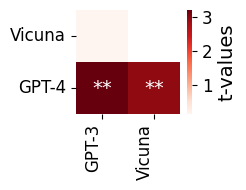

In [ ]:
# Calculate the medians
df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']=='flash-fiction') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)

means = df.groupby("model")["lziv"].mean()
# Order models by median
order = means.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

#print mean of each model
print(df.groupby("model")["lziv"].mean())
# Recompute the t-values and p-values
tvals_df, pvals_df = compute_tvals_pvals(df, "model", metric="lziv")

# Make sure the dataframes are ordered correctly
tvals_df = tvals_df.loc[order, order]
pvals_df = pvals_df.loc[order, order]


#use plot tval function
plot_tvals_matrix(
    tvals_df,
    pvals_df,
    save="../figures/tvals_matrix_FF_lz",
    size=(2.5, 2))

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Flash Fiction')

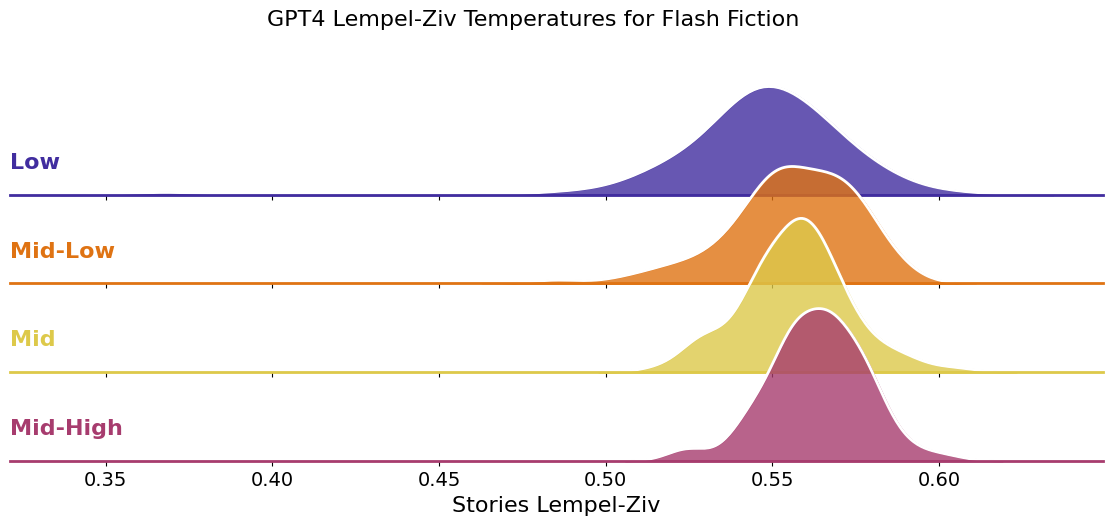

In [5]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='flash-fiction') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=4, desat=.9)
pal = [pal[0], pal[2], pal[3], pal[1]]
order = ['Low', 'Mid-Low', 'Mid', 'Mid-High']
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal, row_order=order, hue_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Flash Fiction', fontsize=16)
#g.savefig(f'../figures/GPT4_lziv_ridge_flashfiction_temp.png', dpi=300, bbox_inches='tight')

### Haikus

Text(0.5, 0.98, 'Divergent Semantic Integration of Haikus')

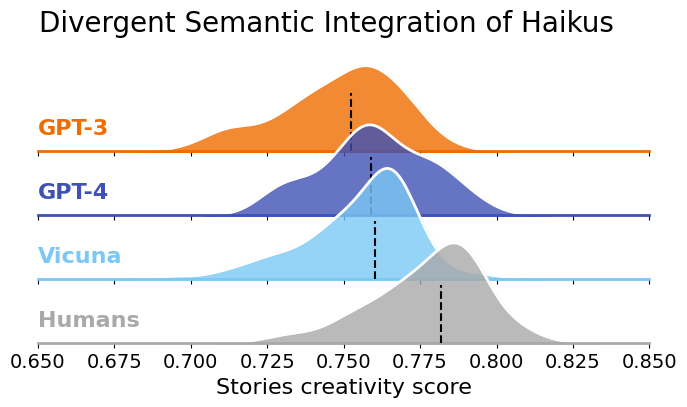

In [ ]:

colors = {'GPT-3':'#EF6C00',
          'GPT-4':'#3F51B5',
          'Humans':'darkgrey',
          'Vicuna':'#7BC8F6'}

df = results_df[['model', 'condition', 'DSI']].loc[(results_df['condition']=='haiku') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)
df["model"].replace("human", "Humans", inplace=True)

# Calculate the medians
medians = df.groupby("model")["lziv"].median()
# Order models by median
order = medians.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

g = sns.FacetGrid(df, row="model", hue="model", aspect=9, height=1.3, palette=colors)
# set figure size
g.fig.set_size_inches(7, 4)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
    median = medians[label]
    ax.axvline(median, color='black', linestyle='--', ymin=0, ymax=0.5)
    ax.grid(False)

g.map(label, "lziv")

for ax in g.axes.flat:
    ax.set_xlabel('Stories creativity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# set x axis range
g.set(xlim=(0.65, 0.85))
g.fig.suptitle('Lempel-Ziv of Haikus', fontsize=20)
g.savefig(f'figures/lziv_haiku_mid_temp.png', dpi=300, bbox_inches='tight')


model
GPT-4     0.751778
Vicuna    0.754825
GPT-3     0.754979
human     0.770130
Name: lziv, dtype: float64


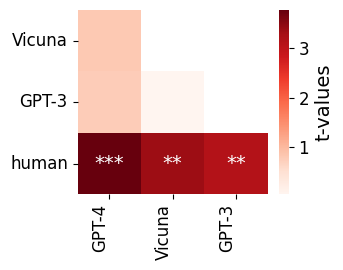

In [ ]:
# Calculate the medians
df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']=='haiku') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)

means = df.groupby("model")["lziv"].mean()
# Order models by median
order = means.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

#print mean of each model
print(df.groupby("model")["lziv"].mean())
# Recompute the t-values and p-values
tvals_df, pvals_df = compute_tvals_pvals(df, "model", metric="lziv")

# Make sure the dataframes are ordered correctly
tvals_df = tvals_df.loc[order, order]
pvals_df = pvals_df.loc[order, order]


#use plot tval function
plot_tvals_matrix(
    tvals_df,
    pvals_df,
    save="figures/tvals_matrix_haiku_lz",
    size=(3.5, 2.8))

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Haiku')

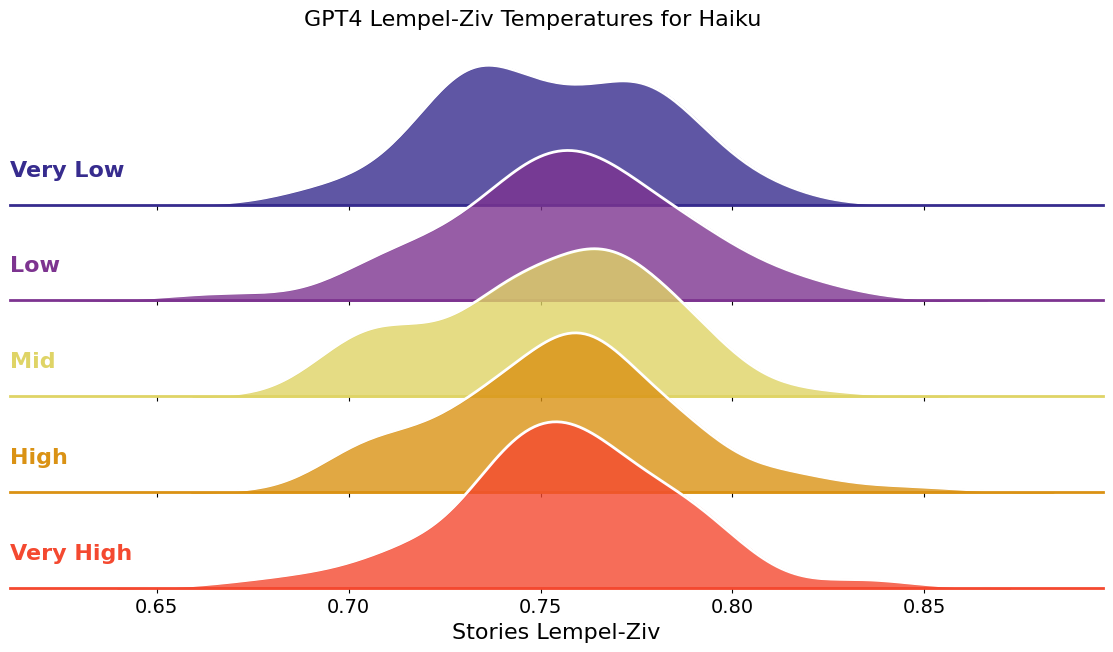

In [ ]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='haiku') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
order = ["Very Low", "Low", "Mid", "High", "Very High"]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal, hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Haiku', fontsize=16)
g.savefig(f'figures/GPT4_lziv_ridge_haiku_temp.png', dpi=300, bbox_inches='tight')

## Synopsis

Text(0.5, 0.98, 'Divergent Semantic Integration of Synopses')

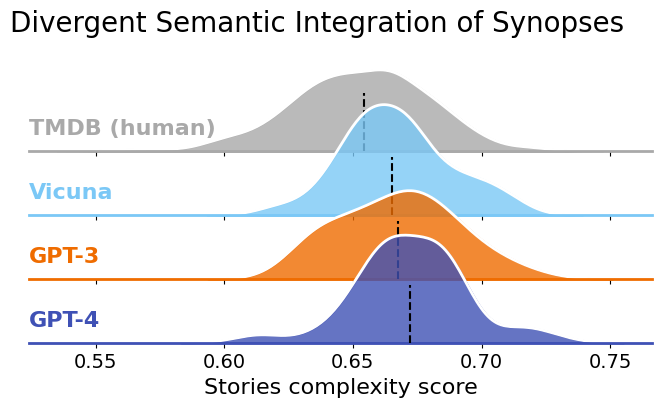

In [ ]:
colors = {'GPT-3':'#EF6C00',
          'GPT-4':'#3F51B5',
          'TMDB (human)':'darkgrey',
          'Vicuna':'#7BC8F6'}

df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']=='synopsis') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)

df['model'].replace('human', 'TMDB (human)', inplace=True)
# Calculate the medians
medians = df.groupby("model")["lziv"].median()
# Order models by median
order = medians.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

g = sns.FacetGrid(df, row="model", hue="model", aspect=9, height=1.3, palette=colors)
# set figure size
g.fig.set_size_inches(7, 4)

# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
    median = medians[label]
    ax.axvline(median, color='black', linestyle='--', ymin=0, ymax=0.5)
    ax.grid(False)

g.map(label, "lziv")

for ax in g.axes.flat:
    ax.set_xlabel('Stories complexity score', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.suptitle('Lempel Ziv of Synopses', fontsize=20)
g.savefig(f'figures/LZ_synopsis_mid_temp.png', dpi=300, bbox_inches='tight')


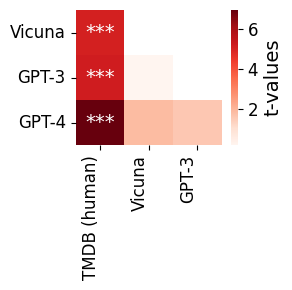

In [ ]:
# Calculate the medians
df = results_df[['model', 'condition', 'lziv']].loc[(results_df['condition']=='synopsis') & (results_df['temp']=='Mid')]
# rename model GPT3 to GPT-3
df["model"].replace("GPT3", "GPT-3", inplace=True)
# rename model GPT4 to GPT-4
df["model"].replace("GPT4", "GPT-4", inplace=True)

df['model'].replace('human', 'TMDB (human)', inplace=True)
medians = df.groupby("model")["lziv"].median()
# Order models by median
order = medians.sort_values().index

# Create new categorical variable for model respecting this order
df["model"] = pd.Categorical(df["model"], categories=order, ordered=True)

# Recompute the t-values and p-values
tvals_df, pvals_df = compute_tvals_pvals(df, 'model', metric="lziv")

# Make sure the dataframes are ordered correctly
tvals_df = tvals_df.loc[order, order]
pvals_df = pvals_df.loc[order, order]


#use plot tval function
plot_tvals_matrix(
    tvals_df,
    pvals_df,
    save='figures/tvals_synopsis_mid_temp_lziv.png',
    size=(3, 3))

### GPT-4

Text(0.5, 0.98, 'GPT4 Lempel-Ziv Temperatures for Synopsis')

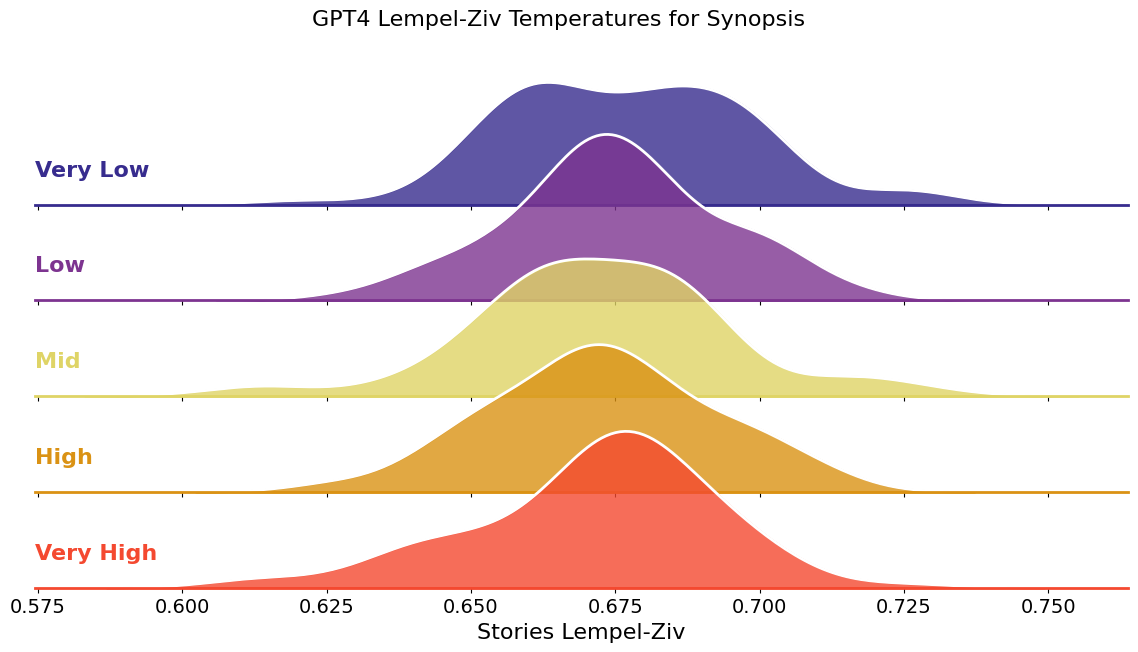

In [ ]:
# Make a ridge plot like the one above looking at the effect of temperature on the DSI for each model separetaly
df = results_df.loc[(results_df['condition']=='synopsis') & (results_df['model']=='GPT4')]
pal = sns.color_palette('CMRmap',n_colors=5, desat=.9)
order = ["Very Low", "Low", "Mid", "High", "Very High"]
pal = [pal[0], pal[1], pal[4], pal[3], pal[2]]
g = sns.FacetGrid(df, row="temp", hue="temp", aspect=9, height=1.3,palette=pal,hue_order=order, row_order=order)
# make transparent background
for ax in g.axes.flat:
    ax.set_facecolor('none')
# Draw the densities in a few steps
g.map(sns.kdeplot, "lziv",
    bw_adjust=1, clip_on=False,
    fill=True, alpha=0.8, linewidth=1.5)
g.map(sns.kdeplot, "lziv", clip_on=False, color="w", lw=2, bw_adjust=1)
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    # check if Human is in the label
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes,fontsize=16)
g.map(label, "lziv")


for ax in g.axes.flat:
    ax.set_xlabel('Stories Lempel-Ziv', fontsize=16)
    for label in ax.get_xticklabels():
            label.set_fontsize(14)
# Remove axes details that don't play well with overlap
g.set_titles("")
# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.45)
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
# add one title for all the subplots
g.fig.suptitle('GPT4 Lempel-Ziv Temperatures for Synopsis', fontsize=16)
g.savefig(f'figures/GPT4_lziv_ridge_synopsis_temp.png', dpi=300, bbox_inches='tight')